Problem Statement

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

Load Libraries


In [1347]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loads and read files

In [1348]:
#read files
#Reading train file:
data = pd.read_csv('https://raw.githubusercontent.com/qlik-oss/sse-r-plugin/master/sense_apps/R_DecisionTree/Titanic_data.csv')


In [1349]:
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,"211,34"
1,2,1,1,male,"0,9167",Child,"151,55"
2,3,1,0,female,2,Child,"151,55"
3,4,1,0,male,30,Adult,"151,55"
4,5,1,0,female,25,Adult,"151,55"
...,...,...,...,...,...,...,...
1304,1305,3,0,female,"14,5",Child,"14,45"
1305,1306,3,0,female,NaN,Adult,"14,45"
1306,1307,3,0,male,"26,5",Adult,"7,22"
1307,1308,3,0,male,27,Adult,"7,22"


In [1350]:
data.describe()

,ID,pclass,survived
count,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,0.381971
std,378.020061,0.837836,0.486055
min,1.000000,1.000000,0.000000
25%,328.000000,2.000000,0.000000
50%,655.000000,3.000000,0.000000
75%,982.000000,3.000000,1.000000
max,1309.000000,3.000000,1.000000


In [1351]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        1309 non-null   int64 
 1   pclass    1309 non-null   int64 
 2   survived  1309 non-null   int64 
 3   sex       1309 non-null   object
 4   age       1046 non-null   object
 5   age_b     1309 non-null   object
 6   fare      1308 non-null   object
dtypes: int64(3), object(4)
memory usage: 71.7+ KB


Replace comma with full stop

In [1352]:
data.age = data.age.str.replace(',','.')
data.fare = data.fare.str.replace(',','.')
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2,Child,151.55
3,4,1,0,male,30,Adult,151.55
4,5,1,0,female,25,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5,Adult,7.22
1307,1308,3,0,male,27,Adult,7.22


Convert object to float

In [1353]:
data.age = data.age.astype(float)
data.fare = data.fare.astype(float)
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,NaN,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


Check for null values

In [1354]:
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

Replace null values with 0

In [1355]:
data.fillna(0)

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,0.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


Check for null values

In [1356]:
data.isnull().sum()

ID            0
pclass        0
survived      0
sex           0
age         263
age_b         0
fare          1
dtype: int64

In [1357]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1309 non-null   int64  
 1   pclass    1309 non-null   int64  
 2   survived  1309 non-null   int64  
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   age_b     1309 non-null   object 
 6   fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 71.7+ KB


Impute

In [1358]:
mask = (data['age_b'] == 'Adult')
data.loc[data['age'].isnull() & mask, 'age'] = data.age.median()

mask = (data['age_b'] == 'Child')
data.loc[data['age'].isnull() & mask, 'age'] = 9

data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
2,3,1,0,female,2.0000,Child,151.55
3,4,1,0,male,30.0000,Adult,151.55
4,5,1,0,female,25.0000,Adult,151.55
...,...,...,...,...,...,...,...
1304,1305,3,0,female,14.5000,Child,14.45
1305,1306,3,0,female,28.0000,Adult,14.45
1306,1307,3,0,male,26.5000,Adult,7.22
1307,1308,3,0,male,27.0000,Adult,7.22


In [1359]:
data.isnull().sum()

ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        1
dtype: int64

In [1360]:
data['fare'] = data['fare'].fillna(data['fare'].median())

In [1361]:
data.isnull().sum()

ID          0
pclass      0
survived    0
sex         0
age         0
age_b       0
fare        0
dtype: int64

Perform analysis

Passengers

In [1362]:
survived = data.groupby('survived').survived.count()
survived

survived
0    809
1    500
Name: survived, dtype: int64

In [1363]:
percent_survived = (survived / len(data)) * 100
percent_survived

survived
0    61.802903
1    38.197097
Name: survived, dtype: float64

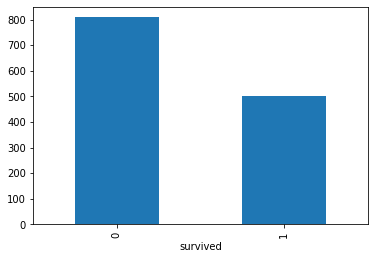

In [1364]:
data.groupby('survived').survived.count().plot.bar(ylim=0)
plt.show()

Sex

In [1365]:
sex = data.groupby('sex').survived.count()
sex

sex
female    466
male      843
Name: survived, dtype: int64

In [1366]:
percent_sex = (sex / len(data)) * 100
percent_sex

sex
female    35.599694
male      64.400306
Name: survived, dtype: float64

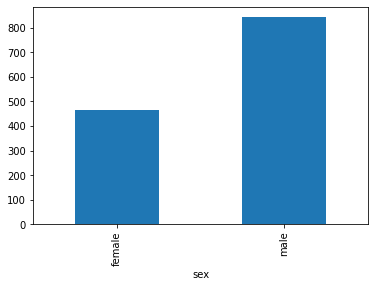

In [1367]:
data.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

Passenger class

In [1368]:
pclass = data.groupby('pclass').survived.count()
pclass

pclass
1    323
2    277
3    709
Name: survived, dtype: int64

In [1369]:
percent_class = (pclass / len(data)) * 100
percent_class

pclass
1    24.675325
2    21.161192
3    54.163484
Name: survived, dtype: float64

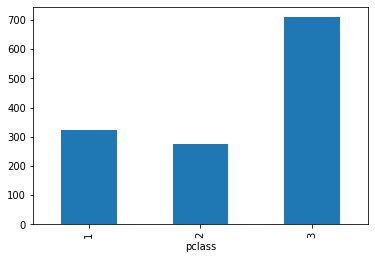

In [1370]:
data.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

Adult or child

In [1371]:
age_b = data.groupby('age_b').survived.count()
age_b

age_b
Adult    1200
Child     109
Name: survived, dtype: int64

In [1372]:
percent_age = (age_b / len(data)) * 100
percent_age

age_b
Adult    91.673033
Child     8.326967
Name: survived, dtype: float64

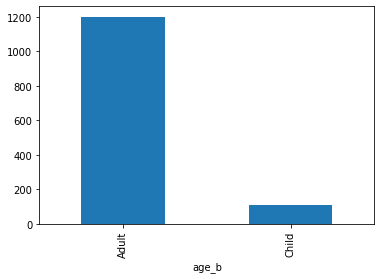

In [1373]:
data.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

Age

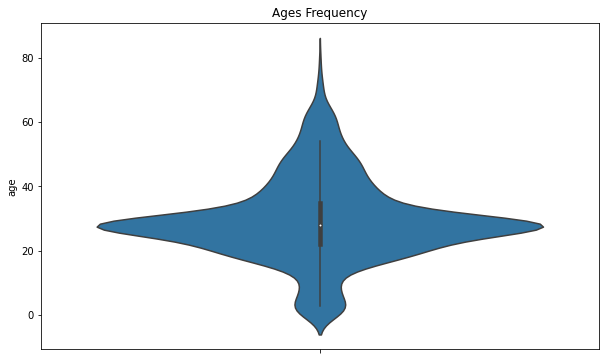

In [1374]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["age"])
plt.show()

In [1375]:
max_age = data.age.max()
max_age

80.0

In [1376]:
min_age = data.age.min()
min_age

0.1667

In [1377]:
median_age = data.age.median()
median_age

28.0

In [1378]:
most_age = data.age.mode()
most_age

0    28.0
dtype: float64

Fare

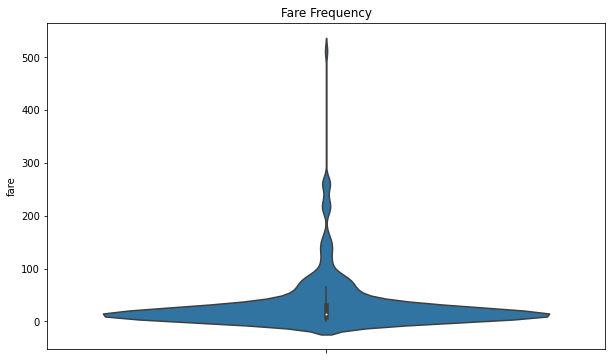

In [1379]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=data["fare"])
plt.show()

In [1380]:
max_fare = data.fare.max()
max_fare

512.33

In [1381]:
min_fare = data.fare.min()
min_fare

0.0

In [1382]:
median_fare = data.fare.median()
median_fare

14.45

In [1383]:
most_fare = data.fare.mode()
most_fare

0    8.05
dtype: float64

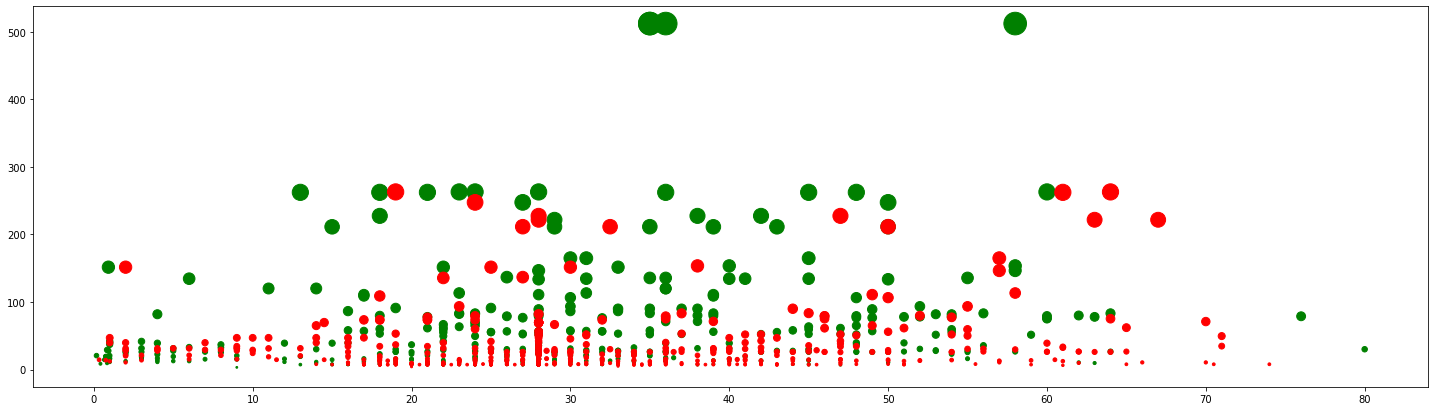

In [1384]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(data[data['survived'] == 1]['age'], data[data['survived'] == 1]['fare'], c='green', s=data[data['survived'] == 1]['fare'])
ax.scatter(data[data['survived'] == 0]['age'], data[data['survived'] == 0]['fare'], c='red', s=data[data['survived'] == 0]['fare']);

Filter survivors

In [1385]:
include = data[data['survived'].values == 1]
exclude = data[data['survived'].values != 1]
survived = include
survived

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,female,29.0000,Adult,211.34
1,2,1,1,male,0.9167,Child,151.55
5,6,1,1,male,48.0000,Adult,26.55
6,7,1,1,female,63.0000,Adult,77.96
8,9,1,1,female,53.0000,Adult,51.48
...,...,...,...,...,...,...,...
1261,1262,3,1,female,63.0000,Adult,9.59
1277,1278,3,1,male,22.0000,Adult,7.22
1286,1287,3,1,female,38.0000,Adult,7.23
1290,1291,3,1,female,47.0000,Adult,7.00


Survived sex

In [1386]:
survived_sex = survived.groupby('sex').survived.count()
survived_sex

sex
female    339
male      161
Name: survived, dtype: int64

In [1387]:
percent_survived_sex = (survived_sex / len(survived)) * 100
percent_survived_sex

sex
female    67.8
male      32.2
Name: survived, dtype: float64

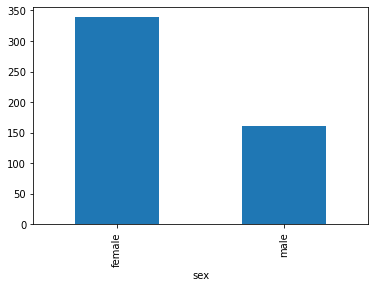

In [1388]:
survived.groupby('sex').survived.count().plot.bar(ylim=0)
plt.show()

Survived Passenger class

In [1389]:
survived_pclass = survived.groupby('pclass').survived.count()
survived_pclass

pclass
1    200
2    119
3    181
Name: survived, dtype: int64

In [1390]:
percent_survived_class = (survived_pclass / len(survived)) * 100
percent_survived_class

pclass
1    40.0
2    23.8
3    36.2
Name: survived, dtype: float64

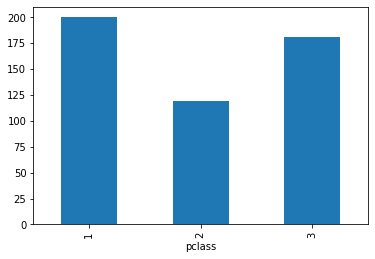

In [1391]:
survived.groupby('pclass').survived.count().plot.bar(ylim=0)
plt.show()

Survived adult or child

In [1392]:
survived_age_b = survived.groupby('age_b').survived.count()
survived_age_b

age_b
Adult    439
Child     61
Name: survived, dtype: int64

In [1393]:
survived_percent_age = (survived_age_b / len(survived)) * 100
survived_percent_age

age_b
Adult    87.8
Child    12.2
Name: survived, dtype: float64

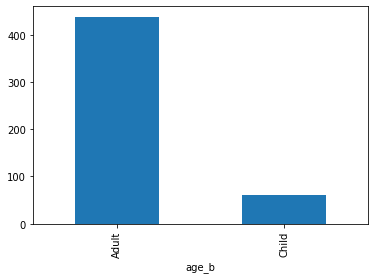

In [1394]:
survived.groupby('age_b').survived.count().plot.bar(ylim=0)
plt.show()

Survived Age

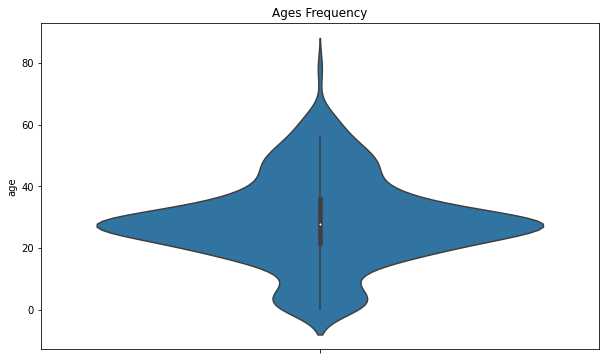

In [1395]:
plt.figure(figsize=(10,6))
plt.title("Ages Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["age"])
plt.show()

In [1396]:
survived_max_age = survived.age.max()
survived_max_age

80.0

In [1397]:
survived_min_age = survived.age.min()
survived_min_age

0.1667

In [1398]:
survived_median_age = survived.age.median()
survived_median_age

28.0

In [1399]:
survived_most_age = survived.age.mode()
survived_most_age

0    28.0
dtype: float64

Survived Fare

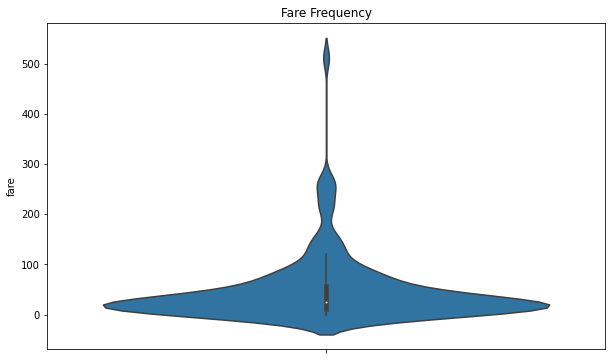

In [1400]:
plt.figure(figsize=(10,6))
plt.title("Fare Frequency")
sns.axes_style("dark")
sns.violinplot(y=survived["fare"])
plt.show()

In [1401]:
survived_max_fare = survived.fare.max()
survived_max_fare

512.33

In [1402]:
survived_min_fare = survived.fare.min()
survived_min_fare

0.0

In [1403]:
survived_median_fare = survived.fare.median()
survived_median_fare

26.0

In [1404]:
survived_mode_fare = survived.fare.mode()
survived_mode_fare

0    26.0
dtype: float64

Ordinal encode categorical columns

In [1405]:
sex1={'male':1, 'female':2}
data.sex=data.sex.map(sex1)

In [1406]:
age1={'Adult':1, 'Child':2}
data.age_b=data.age_b.map(age1)

Convert age and fare to integar

In [1407]:
data.age = data.age.astype(int)
data.fare = data.fare.astype(int)

In [1408]:
data

,ID,pclass,survived,sex,age,age_b,fare
0,1,1,1,2,29,1,211
1,2,1,1,1,0,2,151
2,3,1,0,2,2,2,151
3,4,1,0,1,30,1,151
4,5,1,0,2,25,1,151
...,...,...,...,...,...,...,...
1304,1305,3,0,2,14,2,14
1305,1306,3,0,2,28,1,14
1306,1307,3,0,1,26,1,7
1307,1308,3,0,1,27,1,7


Set up X and y values

In [1409]:
y = data["survived"]
features = ["pclass", "sex", "age", "age_b", "fare"]
X = data[features]

In [1410]:
num_feature = len(X.columns)
print(num_feature)

5


Normalise data

In [1411]:
X = (X-X.min()) / (X.max() - X.min())
X

,pclass,sex,age,age_b,fare
0,0.0,1.0,0.3625,0.0,0.412109
1,0.0,0.0,0.0000,1.0,0.294922
2,0.0,1.0,0.0250,1.0,0.294922
3,0.0,0.0,0.3750,0.0,0.294922
4,0.0,1.0,0.3125,0.0,0.294922
...,...,...,...,...,...
1304,1.0,1.0,0.1750,1.0,0.027344
1305,1.0,1.0,0.3500,0.0,0.027344
1306,1.0,0.0,0.3250,0.0,0.013672
1307,1.0,0.0,0.3375,0.0,0.013672


Split the training file for training and testing

In [1412]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, shuffle=True, random_state=1, stratify=y)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1178, 5), (1178,), (131, 5), (131,))

PyTorch

Import libraries

In [1413]:
#import libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix, classification_report

Model parameters

In [1414]:
#model parameters
EPOCHS = 45
BATCH_SIZE = 64
LEARNING_RATE = 0.001

Define train and test dataloaders 

In [1415]:
## train data
class trainData(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_data = trainData(torch.FloatTensor(X_train.values), 
                       torch.FloatTensor(y_train.values))
## test data    
class testData(Dataset):
    
    def __init__(self, X_data):
        self.X_data = X_data
        
    def __getitem__(self, index):
        return self.X_data[index]
        
    def __len__ (self):
        return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test.values))

Initialise data loader

In [1416]:
#initialise data loader
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

Define binary class

In [1417]:
class binaryClassification(nn.Module):
    def __init__(self):
        super(binaryClassification, self).__init__()
        # Number of input features is 12.
        self.layer_1 = nn.Linear(num_feature, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x

Define device

In [1418]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Define model

In [1419]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=5, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


Define accuracy function

In [1420]:
def binary_acc(y_pred, y_test):
    y_pred_tag = torch.round(torch.sigmoid(y_pred))

    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum/y_test.shape[0]
    acc = torch.round(acc * 100)
    
    return acc

Train model

In [1421]:
model.train()
for e in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        
        y_pred = model(X_batch)
        
        loss = criterion(y_pred, y_batch.unsqueeze(1))
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        

    print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

Epoch 001: | Loss: 0.57740 | Acc: 70.211
Epoch 002: | Loss: 0.46682 | Acc: 78.526
Epoch 003: | Loss: 0.46264 | Acc: 79.684
Epoch 004: | Loss: 0.45658 | Acc: 79.158
Epoch 005: | Loss: 0.44738 | Acc: 78.947
Epoch 006: | Loss: 0.45353 | Acc: 78.474
Epoch 007: | Loss: 0.45254 | Acc: 79.421
Epoch 008: | Loss: 0.43280 | Acc: 80.684
Epoch 009: | Loss: 0.43678 | Acc: 79.789
Epoch 010: | Loss: 0.44779 | Acc: 79.158
Epoch 011: | Loss: 0.44337 | Acc: 79.842
Epoch 012: | Loss: 0.43008 | Acc: 80.474
Epoch 013: | Loss: 0.44251 | Acc: 79.684
Epoch 014: | Loss: 0.43298 | Acc: 80.737
Epoch 015: | Loss: 0.42029 | Acc: 79.895
Epoch 016: | Loss: 0.43293 | Acc: 81.737
Epoch 017: | Loss: 0.42859 | Acc: 79.368
Epoch 018: | Loss: 0.42779 | Acc: 80.053
Epoch 019: | Loss: 0.44649 | Acc: 79.579
Epoch 020: | Loss: 0.42820 | Acc: 81.474
Epoch 021: | Loss: 0.42989 | Acc: 79.474
Epoch 022: | Loss: 0.43379 | Acc: 78.684
Epoch 023: | Loss: 0.43449 | Acc: 79.737
Epoch 024: | Loss: 0.43675 | Acc: 80.421
Epoch 025: | Los

Convert predictions to a list

In [1422]:
y_pred_list = []
model.eval()
with torch.no_grad():
    for X_batch in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        y_test_pred = torch.sigmoid(y_test_pred)
        y_pred_tag = torch.round(y_test_pred)
        y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

Accuracy score

In [1423]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_list)
print(accuracy)

0.8015267175572519


Confusion matrix

In [1424]:
confusion_matrix(y_test, y_pred_list)

array([[72,  9],
       [17, 33]])

Classification report

In [1425]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        81
           1       0.79      0.66      0.72        50

    accuracy                           0.80       131
   macro avg       0.80      0.77      0.78       131
weighted avg       0.80      0.80      0.80       131



In [1426]:
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred_list})
df

,Actual,Predicted
141,1,1.0
934,1,0.0
603,1,0.0
906,0,0.0
1117,0,0.0
...,...,...
595,0,0.0
539,0,0.0
137,1,1.0
1134,0,0.0


Plot errors

In [1427]:
from sklearn.decomposition import PCA

pca_val = PCA(n_components=2)
principalComponents_val = pca_val.fit_transform(X_test)

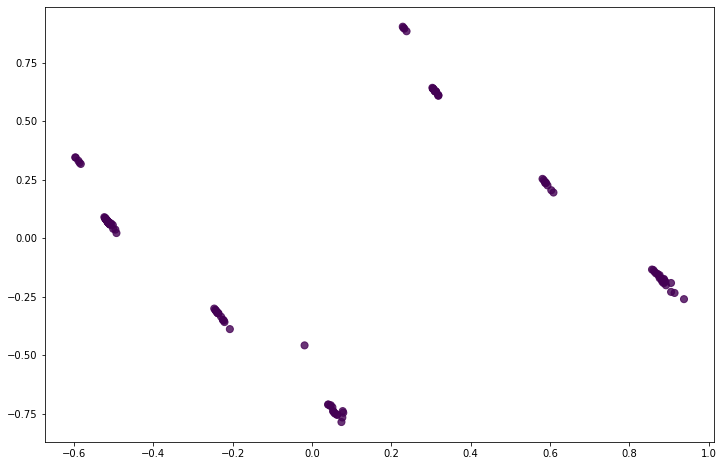

In [1428]:
plt.figure(figsize = (12, 8))
plt.scatter(principalComponents_val[:, 0], principalComponents_val[:,1], c = y_pred == y_test - 1, alpha = .8, s = 50)